<a href="https://colab.research.google.com/github/ameedia/projetOptimisation/blob/main/Projet_Optimisation_Sto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projet Optimisation

In [1]:
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import time
from scipy import stats 
import scipy.optimize as op



1. **Pour 1D**



In [3]:
def f1d(X):
  return 418.9828 - X*np.sin(np.sqrt(np.abs(X)))

In [4]:
def gradientf1d(X):
  return -(np.sin(np.sqrt(np.abs(X))) + X*np.cos(np.sqrt(np.abs(X)))/(2*np.sqrt(np.abs(X))))

In [5]:
def gd2_rmsprop1d(x, grad, alpha, beta=0.9, eps=1e-8, max_iter=10):
    xs = np.zeros((1 + max_iter))
    xs[0] = x
    v = 0
    for i in range(max_iter):
        v = beta*v + (1-beta)*grad(x)**2
        x = x - alpha * grad(x) / (eps + np.sqrt(v))
        xs[i+1] = x
    return xs

In [7]:
%time op.fmin(f1d,(0.0))

Optimization terminated successfully.
         Current function value: 415.037498
         Iterations: 30
         Function evaluations: 60
CPU times: user 5.21 ms, sys: 21 µs, total: 5.24 ms
Wall time: 4.88 ms


array([5.2391875])

In [82]:
rs = gd2_rmsprop1d(x=20, grad=gradientf1d,alpha=0.888,beta=0.9, eps=1e-8, max_iter=100)

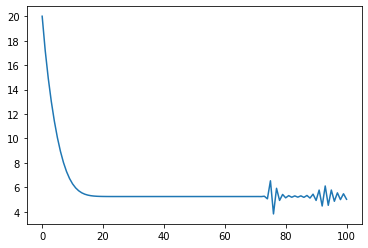

In [83]:
plt.plot(rs)



2.   **Pour 2D**



In [ ]:
def f2d(X):
  vf = 0
  D= X.shape[0]
  print(D)
  const = 418.9828*D
  print(const)
  for i in range(D):
    f1 = const
    vf += X[i]*np.sin(np.sqrt(np.abs(X[i])))
    print(vf)
    vfd = f1 - vf
  return vfd

In [178]:
def grad2d(X):
  return np.array([
      -(np.sin(np.sqrt(np.abs(X[0]))) + X[0]*np.cos(np.sqrt(np.abs(X[0])))/(2*np.sqrt(np.abs(X[0])))),
      -(np.sin(np.sqrt(np.abs(X[1]))) + X[1]*np.cos(np.sqrt(np.abs(X[1])))/(2*np.sqrt(np.abs(X[1]))))
    ])

In [179]:
def gd2_rmsprop2d(x, grad, alpha, beta=0.9, eps=1e-8, max_iter=10):
    xs = np.zeros((1 + max_iter, x.shape[0]))
    xs[0, :] = x
    v = 0
    for i in range(max_iter):
        v = beta*v + (1-beta)*grad(x)**2
        x = x - alpha * grad(x) / (eps + np.sqrt(v))
        xs[i+1, :] = x
    return xs

In [ ]:
gd2_rmsprop2d(x=np.array([-20,20]), grad=grad2d, alpha=0.98, beta=0.9, eps=1e-8, max_iter=100)

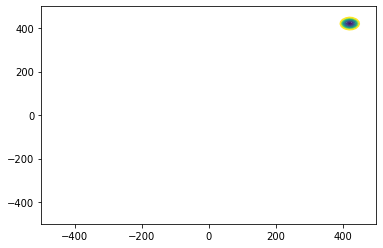

In [181]:
xs = gd2_rmsprop2d(x=np.array([-20,20]), grad=grad2d, alpha=0.98, beta=0.9, eps=1e-8, max_iter=100)
x = np.linspace(-500, 500, 100)
y = np.linspace(-500, 500, 100)
X, Y = np.meshgrid(x, y)
levels = [0.1,1,2,4,9, 16, 25, 36, 49, 64, 81, 100]
Z = 418.9828*2 - (x*np.sin(np.sqrt(np.abs(x))) + Y*np.sin(np.sqrt(np.abs(Y))))
c = plt.contour(X, Y, Z, levels)
pass

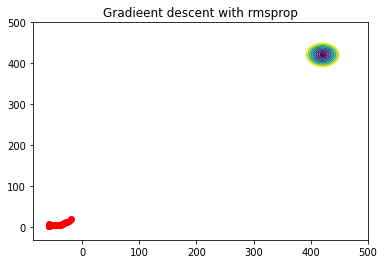

In [182]:
xs = gd2_rmsprop2d(x=np.array([-20,20]), grad=grad2d, alpha=0.98, beta=0.9, eps=1e-8, max_iter=100)
x = np.linspace(-30, 500, 100)
y = np.linspace(-30, 500, 100)
X, Y = np.meshgrid(x, y)
levels = [0.1,1,2,4,9, 16, 25, 36, 49, 64, 81, 100]
Z = 418.9828*2 -( x*np.sin(np.sqrt(np.abs(x))) + Y*np.sin(np.sqrt(np.abs(Y))))
c = plt.contour(X, Y, Z, levels)
plt.plot(xs[:, 0], xs[:, 1], 'o-', c='red')
plt.title('Gradieent descent with rmsprop')
pass



3.   **Pour 10D**



In [183]:
def grad10d(X):
  return np.array([
      -(np.sin(np.sqrt(np.abs(X[0]))) + X[0]*np.cos(np.sqrt(np.abs(X[0])))/(2*np.sqrt(np.abs(X[0])))),
      -(np.sin(np.sqrt(np.abs(X[1]))) + X[1]*np.cos(np.sqrt(np.abs(X[1])))/(2*np.sqrt(np.abs(X[1])))),
      -(np.sin(np.sqrt(np.abs(X[2]))) + X[2]*np.cos(np.sqrt(np.abs(X[2])))/(2*np.sqrt(np.abs(X[2])))),
      -(np.sin(np.sqrt(np.abs(X[3]))) + X[3]*np.cos(np.sqrt(np.abs(X[3])))/(2*np.sqrt(np.abs(X[3])))),
      -(np.sin(np.sqrt(np.abs(X[4]))) + X[4]*np.cos(np.sqrt(np.abs(X[4])))/(2*np.sqrt(np.abs(X[4])))),
      -(np.sin(np.sqrt(np.abs(X[5]))) + X[5]*np.cos(np.sqrt(np.abs(X[5])))/(2*np.sqrt(np.abs(X[5])))),
      -(np.sin(np.sqrt(np.abs(X[6]))) + X[6]*np.cos(np.sqrt(np.abs(X[6])))/(2*np.sqrt(np.abs(X[6])))),
      -(np.sin(np.sqrt(np.abs(X[7]))) + X[7]*np.cos(np.sqrt(np.abs(X[7])))/(2*np.sqrt(np.abs(X[7])))),
      -(np.sin(np.sqrt(np.abs(X[8]))) + X[8]*np.cos(np.sqrt(np.abs(X[8])))/(2*np.sqrt(np.abs(X[8])))),
      -(np.sin(np.sqrt(np.abs(X[9]))) + X[9]*np.cos(np.sqrt(np.abs(X[9])))/(2*np.sqrt(np.abs(X[9]))))
    ])

In [184]:
def gd2_rmsprop10d(x, grad, alpha, beta=0.9, eps=1e-8, max_iter=10):
    xs = np.zeros((1 + max_iter, x.shape[0]))
    xs[0, :] = x
    v = 0
    for i in range(max_iter):
        v = beta*v + (1-beta)*grad(x)**2
        x = x - alpha * grad(x) / (eps + np.sqrt(v))
        xs[i+1, :] = x
    return xs

In [198]:
gd2_rmsprop2d(x=np.array([20,20,-20,20,-20,20,20,20,20,20]), grad=grad10d, alpha=0.89, beta=0.9, eps=1e-8, max_iter=100)

array([[ 20.        ,  20.        , -20.        , ...,  20.        ,
         20.        ,  20.        ],
       [ 17.18557294,  17.18557294, -22.81442691, ...,  17.18557294,
         17.18557294,  17.18557294],
       [ 14.91121758,  14.91121758, -25.46074215, ...,  14.91121758,
         14.91121758,  14.91121758],
       ...,
       [  5.54018216,   5.54018216, -57.70751143, ...,   5.54018216,
          5.54018216,   5.54018216],
       [  4.9985955 ,   4.9985955 , -57.70751143, ...,   4.9985955 ,
          4.9985955 ,   4.9985955 ],
       [  5.44997086,   5.44997086, -57.70751143, ...,   5.44997086,
          5.44997086,   5.44997086]])